# 양자인공지능 학습하기

## 관련 패키지 부르기

In [1]:
import tensorflow_quantum as tfq
import cirq
from cirq.contrib.svg import SVGCircuit

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential, Input, Model

import sympy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 입력 데이터와 기대 출력 레이블 만들기

In [2]:
X_Classic = np.array([[0], [1]], dtype=np.float32)

In [3]:
Qubit = cirq.GridQubit(0, 0)
Initial_rotation_phase = np.random.uniform(0, 2 * np.pi)
X_Quantum_circuit = cirq.Circuit(
  cirq.ry(Initial_rotation_phase)(Qubit)
)
X_Quantum = tfq.convert_to_tensor(
  [X_Quantum_circuit]*len(X_Classic)) 

In [4]:
Y = np.array([[1], [-1]], dtype=np.float32)

## 전통인공지능 부분 만들기: 파라미터 제어 뉴럴넷

In [5]:
def make_classical_NN(x):
    model = Sequential()
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1))
    return model(x)
Classical_NN_In = Input(shape=(1,), dtype=tf.dtypes.float32, name='commands_input')
Classical_NN = make_classical_NN(Classical_NN_In)

## 파라미터를 포함하는 양자회로 만들기

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


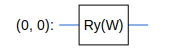

In [6]:
W = sympy.symbols('W')

Quantum_circuit = cirq.Circuit(cirq.ry(W)(Qubit))
SVGCircuit(Quantum_circuit)

## 하이브리드 인공지능 부분 만들기: 양자 및 전통 인공지능 복합형 

In [7]:
Quantum_In = Input(shape=(),dtype=tf.string, name='circuits_input')
Quantum_layer = tfq.layers.ControlledPQC(Quantum_circuit,
                                          operators = cirq.Z(Qubit))
expectation = Quantum_layer([Quantum_In, Classical_NN])
model = Model(inputs=[Quantum_In, Classical_NN_In],
                       outputs=expectation)

## 모델 학습 및 결과 확인하기

In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)
history = model.fit(x=[X_Quantum, X_Classic],
                    y=Y,
                    epochs=50,
                    verbose=0)

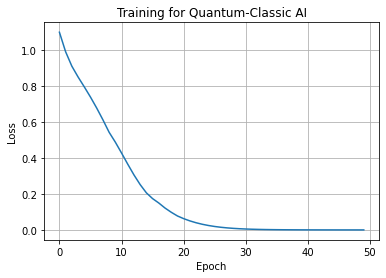

In [10]:
plt.plot(history.history['loss'])
plt.title("Training for Quantum-Classic AI")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [11]:
Y_pred = model([X_Quantum, X_Classic]).numpy()
Err = Y - Y_pred
print('Predicted_Y =', Y_pred.flatten()) 
print('Y - Predicted_Y =', Err.flatten())

Predicted_Y = [ 0.99053454 -0.99961144]
Y - Predicted_Y = [ 0.00946546 -0.00038856]


## 전체 코드

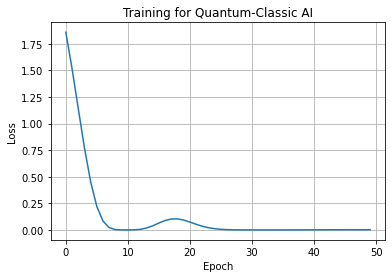

Predicted_Y = [ 0.999363   -0.93838054]
Y - Predicted_Y = [ 0.00063699 -0.06161946]


In [2]:
import tensorflow_quantum as tfq
import cirq
from cirq.contrib.svg import SVGCircuit

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential, Input, Model

import sympy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 입력 데이터와 기대 출력 레이블 만들기
X_Classic = np.array([[0], [1]], dtype=np.float32)

Qubit = cirq.GridQubit(0, 0)
Initial_rotation_phase = np.random.uniform(0, 2 * np.pi)
X_Quantum_circuit = cirq.Circuit(
  cirq.ry(Initial_rotation_phase)(Qubit)
)
X_Quantum = tfq.convert_to_tensor(
  [X_Quantum_circuit]*len(X_Classic)) 

Y = np.array([[1], [-1]], dtype=np.float32)

## 전통인공지능 부분 만들기: 파라미터 제어 뉴럴넷
def make_classical_NN(x):
    model = Sequential()
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1))
    return model(x)
Classical_NN_In = Input(shape=(1,), dtype=tf.dtypes.float32, name='commands_input')
Classical_NN = make_classical_NN(Classical_NN_In)

## 파라미터를 포함하는 양자회로 만들기
W = sympy.symbols('W')

Quantum_circuit = cirq.Circuit(cirq.ry(W)(Qubit))
SVGCircuit(Quantum_circuit)

## 하이브리드 인공지능 부분 만들기: 양자 및 전통 인공지능 복합형 
Quantum_In = Input(shape=(),dtype=tf.string, name='circuits_input')
Quantum_layer = tfq.layers.ControlledPQC(Quantum_circuit,
                                          operators = cirq.Z(Qubit))
expectation = Quantum_layer([Quantum_In, Classical_NN])
model = Model(inputs=[Quantum_In, Classical_NN_In],
                       outputs=expectation)

## 모델 학습 및 결과 확인하기
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)
history = model.fit(x=[X_Quantum, X_Classic],
                    y=Y,
                    epochs=50,
                    verbose=0)

plt.plot(history.history['loss'])
plt.title("Training for Quantum-Classic AI")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

Y_pred = model([X_Quantum, X_Classic]).numpy()
Err = Y - Y_pred
print('Predicted_Y =', Y_pred.flatten()) 
print('Y - Predicted_Y =', Err.flatten())